<a href="https://colab.research.google.com/github/Nyarelia/moores-law-regression/blob/main/moores_law_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.15.0


In [5]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-06-06 13:36:53--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-06-06 13:36:54 (45.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [6]:
# Load data
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [7]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [8]:
# Split data
X = data[:, 0].reshape(-1, 1) # Making N x D matrix
y = data[:, 1]

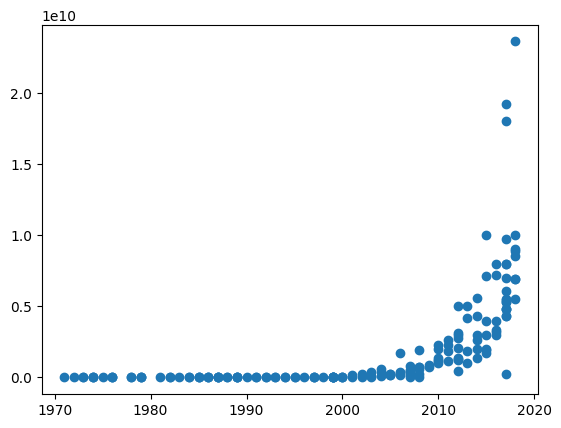

In [9]:
plt.scatter(X, y);

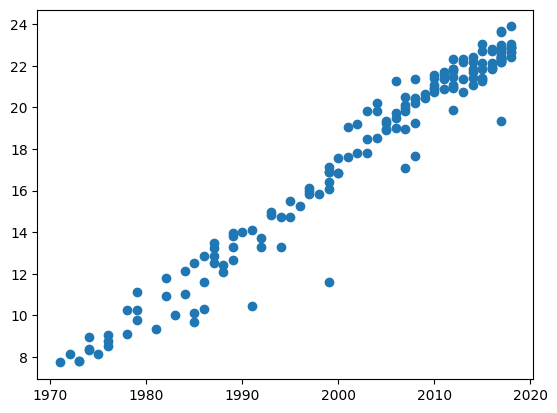

In [10]:
y = np.log(y)
plt.scatter(X, y)

In [11]:
X = X - X.mean()

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse'
)

In [14]:
def schedule(epoch, learnrate):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [15]:
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 2s 5ms/step - loss: 539.0346 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 402.4599 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 331.7881 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 346.7253 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 239.5724 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 128.7705 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 118.7349 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 75.4654 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 68.4267 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 47.9020 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss: 

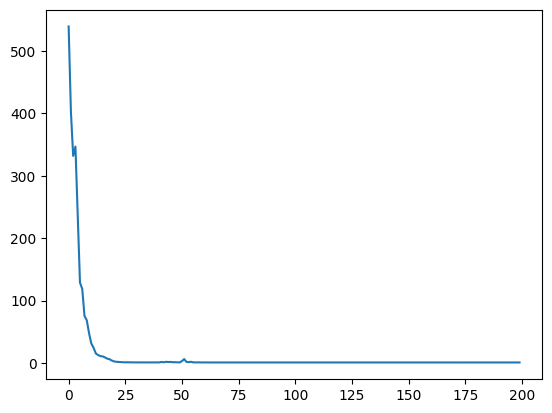

In [16]:
# Plot loss
plt.plot(r.history['loss'], label='loss');

In [17]:
model.layers

In [18]:
model.layers[0].get_weights()

[array([[0.35381365]], dtype=float32), array([17.76512], dtype=float32)]

In [19]:
a = model.layers[0].get_weights()[0][0,0]
a

0.35381365

In [20]:
print('Time to double:', np.log(2) / a)

Time to double: 1.9590741737620978


In [21]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(y) - y.mean()*X.sum() ) / denominator
b = ( y.mean() * X.dot(X) - X.mean() * X.dot(y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)



0.34168248738731305 17.764939393631767
Time to double: 2.0286295205239204


In [22]:
print('Time to double:', np.log(2) / a)

Time to double: 2.0286295205239204


6/6 [==============================] - 0s 2ms/step


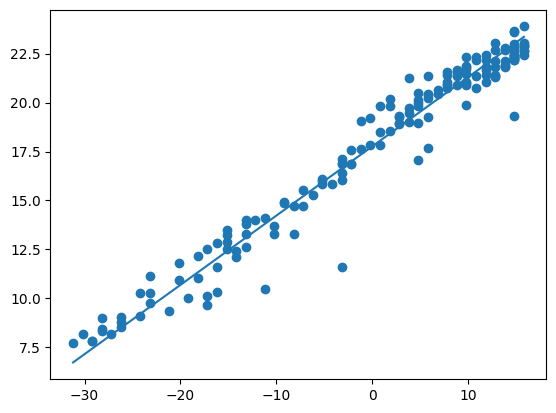

In [24]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, y)
plt.plot(X, Yhat)

In [25]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True